## 주요 내용
* [copy 해서 사용하기](#1.copy-해서-사용하기)
* [반복자 처리](#2.반복자-처리)
* [칼럼 추가 및 변경](#3.칼럼-추가-및-변경)


In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.__version__

'0.22.0'

## 데이터의 4가지 기준


    . 데이터가 구조화를 하려면 데이터 셋의 각 열이 정량적인지 정성적인지 알 수 있어야 한다.
    . 각 데이터를 명목수준, 서열수준, 등간수준, 비율수준 등으로 분류가 필요하다.
    

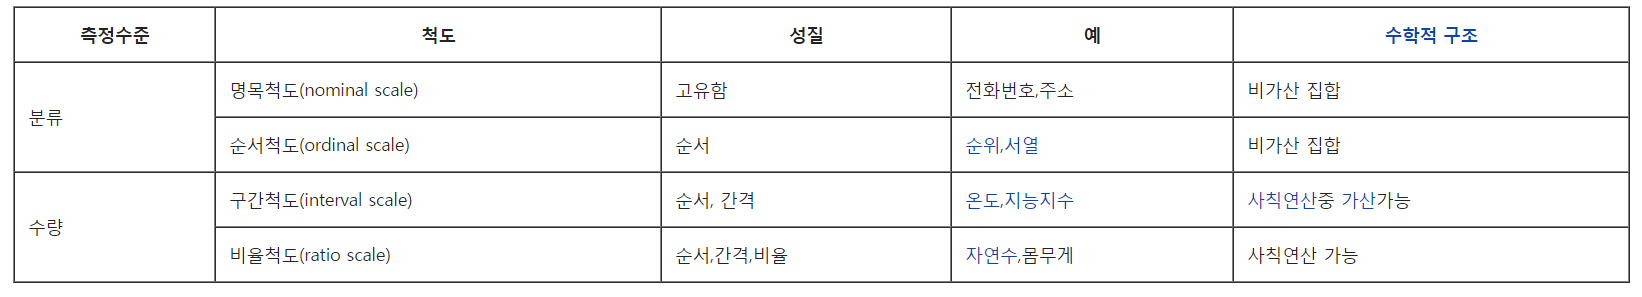

In [3]:
from  IPython.display import Image

Image("분류_수량_pic.png")

### 명목수준 (nominal level)

      . 순수하게 이름이나 범주로 설명되는 데이터로 구성
      . 비교나 set 연산을 제외하고 수학 연산은 불가능하다. 
      . 대부분 범주화 처리된다.
      

####  데이터 타입을 category로 지정하기

In [4]:
s = pd.Series(["a","b","c","a"], dtype="category")

In [5]:
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

####  범주 데이터를 칼럼으로 표시하고 실제 범주에 해당되는 것을 행에 표시하기

In [6]:
s.value_counts()

a    2
c    1
b    1
dtype: int64

In [7]:
pd.get_dummies(s)

a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  1  0  0

#### 특정 칼럼을 cut 함수를 동해 범주로 지정하기

In [8]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})

In [9]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]

In [10]:
df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)

In [11]:
df.head()

value    group
0     26  20 - 29
1     45  40 - 49
2     56  50 - 59
3     95  90 - 99
4     76  70 - 79

### 서열 수준 (ordianl level)

      . 순위를 제공하거나 다른 관측치 앞에 관측치 하나를 배치할 수 있다.
      . 관측치 간의 상대적인 차이점을 제공하지 않는다.
      . 관측치를 더하거나 뺄 수는 없고 정렬과 비교 연산을 처리할 수 있다.
    

### 등간수준 (interval level)

      . 정량화 표현이 가능하면 다양한 수학 공식을 사용할 수 있다.
      . 서열 수준과 차이점은 뺄셈이 허용한다.
      

### 비율수준  (ratio level)

      . 수학적 연산인 곱하기와 나누기 등을 적용할 수 있다.
    

# 1.copy 해서 사용하기

## 시리즈 데이터 처리 기준

In [12]:
s1 = pd.Series(index=list('abcd'), data=np.arange(4))

#### 데이터를 다른 변수에 할당

In [13]:
s2 = s1

#### 두변수가 가진 시리즈 객체를 확인하면 동일하다.

      . 새로운 변수에 할당은 실제 별칭관계

In [14]:
s1 is s2

True

####  다른 객체로 사용할 경우는 copy 메소드 사용

In [15]:
s3 = s1.copy()

In [16]:
s1 is s3

False

### 새로운 자료로 만들어서 사용하려면 실제 데이터 프레임을 카피해서 사용해야 한다.

In [17]:
df11 = pd.DataFrame(np.arange(16).reshape(4,4), index=['a','b','c','d'],columns=['f','g','h','i'])
print(df11)

df_co = df11.copy()


df_co['f'] = 99
print(df_co)


    f   g   h   i
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
    f   g   h   i
a  99   1   2   3
b  99   5   6   7
c  99   9  10  11
d  99  13  14  15


In [18]:
df_co.values.base

array([[99, 99, 99, 99],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]], dtype=int64)

### 데이터 프레임은 새로운 변수에 할당하면 동일한 주소를 가지고 처리되므로 값을 변경할 때 동일한 값이 처리된다

In [19]:
df12 = df11

In [20]:
df12.values == df11.values

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [21]:
df12['f'] = 100

In [22]:
df11

f   g   h   i
a  100   1   2   3
b  100   5   6   7
c  100   9  10  11
d  100  13  14  15

In [23]:
df12

f   g   h   i
a  100   1   2   3
b  100   5   6   7
c  100   9  10  11
d  100  13  14  15

# 2.반복자 처리

      실제 데이터를 검색할 때 반복자를 이용해서 칼럼단위 나 row 단위로 처리도 가능하다.
      

In [24]:
dfa1 = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
     index=pd.date_range('1/1/2000',periods=10))


### 내부의 값을 열단위로 처리

In [25]:
for i in dfa1.iteritems() :
    print(i)

('A', 2000-01-01   -0.861898
2000-01-02   -0.267527
2000-01-03    1.186702
2000-01-04    0.403999
2000-01-05    1.493179
2000-01-06    0.713180
2000-01-07    0.074792
2000-01-08   -0.954350
2000-01-09    2.079848
2000-01-10    0.636191
Freq: D, Name: A, dtype: float64)
('B', 2000-01-01   -0.183178
2000-01-02   -1.316063
2000-01-03   -2.050262
2000-01-04    1.371729
2000-01-05   -0.270602
2000-01-06   -0.144335
2000-01-07   -0.809046
2000-01-08    2.819188
2000-01-09   -0.678269
2000-01-10    0.457636
Freq: D, Name: B, dtype: float64)
('C', 2000-01-01    1.658212
2000-01-02    0.127022
2000-01-03    0.299235
2000-01-04    0.588395
2000-01-05    1.422392
2000-01-06    1.616980
2000-01-07    0.172725
2000-01-08    0.423375
2000-01-09   -0.213741
2000-01-10   -0.557849
Freq: D, Name: C, dtype: float64)


### 행단위로 처리

In [26]:
for i in dfa1.iterrows() :
    print(i)

(Timestamp('2000-01-01 00:00:00', freq='D'), A   -0.861898
B   -0.183178
C    1.658212
Name: 2000-01-01 00:00:00, dtype: float64)
(Timestamp('2000-01-02 00:00:00', freq='D'), A   -0.267527
B   -1.316063
C    0.127022
Name: 2000-01-02 00:00:00, dtype: float64)
(Timestamp('2000-01-03 00:00:00', freq='D'), A    1.186702
B   -2.050262
C    0.299235
Name: 2000-01-03 00:00:00, dtype: float64)
(Timestamp('2000-01-04 00:00:00', freq='D'), A    0.403999
B    1.371729
C    0.588395
Name: 2000-01-04 00:00:00, dtype: float64)
(Timestamp('2000-01-05 00:00:00', freq='D'), A    1.493179
B   -0.270602
C    1.422392
Name: 2000-01-05 00:00:00, dtype: float64)
(Timestamp('2000-01-06 00:00:00', freq='D'), A    0.713180
B   -0.144335
C    1.616980
Name: 2000-01-06 00:00:00, dtype: float64)
(Timestamp('2000-01-07 00:00:00', freq='D'), A    0.074792
B   -0.809046
C    0.172725
Name: 2000-01-07 00:00:00, dtype: float64)
(Timestamp('2000-01-08 00:00:00', freq='D'), A   -0.954350
B    2.819188
C    0.423375
Nam

# 3.칼럼 추가 및 변경

      . 칼럼 추가 및 변경 처리하기

In [27]:
movie = pd.read_csv("./data/data/movie.csv",usecols = ['movie_title','director_name'])

### 칼럼을 추가하기

In [28]:
movie.head()

director_name                                 movie_title
0      James Cameron                                      Avatar
1     Gore Verbinski    Pirates of the Caribbean: At World's End
2         Sam Mendes                                     Spectre
3  Christopher Nolan                       The Dark Knight Rises
4        Doug Walker  Star Wars: Episode VII - The Force Awakens

#### 새로운 칼럼을 추가한다.

In [29]:
movie['has_seen'] = 0

In [30]:
movie.head()

director_name                                 movie_title  has_seen
0      James Cameron                                      Avatar         0
1     Gore Verbinski    Pirates of the Caribbean: At World's End         0
2         Sam Mendes                                     Spectre         0
3  Christopher Nolan                       The Dark Knight Rises         0
4        Doug Walker  Star Wars: Episode VII - The Force Awakens         0

### 실제 칼럼 내의 값을 변경

In [31]:
movie_ref = pd.read_csv("./data/data/movie.csv")

#### 새로운 칼럼을 추가하고 실제 값은 다른 두 칼럼의 합을 넣는다.

In [32]:
movie['has_seen'] = movie_ref['actor_1_facebook_likes'] + movie_ref['actor_2_facebook_likes']

In [33]:
movie.head()

director_name                                 movie_title  has_seen
0      James Cameron                                      Avatar    1936.0
1     Gore Verbinski    Pirates of the Caribbean: At World's End   45000.0
2         Sam Mendes                                     Spectre   11393.0
3  Christopher Nolan                       The Dark Knight Rises   50000.0
4        Doug Walker  Star Wars: Episode VII - The Force Awakens     143.0

#### 널값이 nan은 계산한 결과도 항상 nan 이다.

     . isnull로 조회하고 True 이 나오고 True는 파이썬에서는 1이므로 합산하면 숫자 결과가 나온다.
     

In [34]:
movie['has_seen'].isnull().sum()

13

## 특정값 갱신

In [35]:
anime = pd.read_csv("./anime/anime.csv",encoding="utf-8")

#### 행을 조회

In [36]:
anime.loc[74]

anime_id                                                  801
name          Ghost in the Shell: Stand Alone Complex 2nd GIG
genre       Action, Mecha, Military, Mystery, Police, Sci-...
type                                                       TV
episodes                                                   26
rating                                                   8.57
members                                                113993
Name: 74, dtype: object

#### 행과 열을 조회

In [37]:
anime.loc[74,'episodes']

'26'

####  특정 행과 열에 대한 값 갱신

In [38]:
anime.loc[74,'episodes'] = np.nan

In [39]:
anime.loc[74,'episodes']

nan

In [40]:
anime.loc[74]

anime_id                                                  801
name          Ghost in the Shell: Stand Alone Complex 2nd GIG
genre       Action, Mecha, Military, Mystery, Police, Sci-...
type                                                       TV
episodes                                                  NaN
rating                                                   8.57
members                                                113993
Name: 74, dtype: object

###  열과 행의 삭제

In [41]:
movie_del = pd.read_csv("./data/data/movie.csv")

In [42]:
movie_del.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### 열을 삭제한다.

      열을 삭제하려면 칼럼 이름으로 정보를 넣어서 삭제한다. axis =1

In [43]:
movie_del1 = movie_del.drop('director_facebook_likes', axis=1)

In [44]:
movie_del1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

### 행을 삭제한다

      행을 삭제하려면 실제 행에 대한 정보를 넣어서 삭제한다.

In [45]:
movie_del.index

RangeIndex(start=0, stop=4916, step=1)

In [46]:
movie_del.shape

(4916, 28)

In [47]:
movie_del2 = movie_del.drop([1,2,3,4], axis=0)

In [48]:
movie_del2.shape

(4912, 28)